<a href="https://colab.research.google.com/github/Omkar-Kaos/C.V.-Experiments/blob/main/C_V_Experiment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

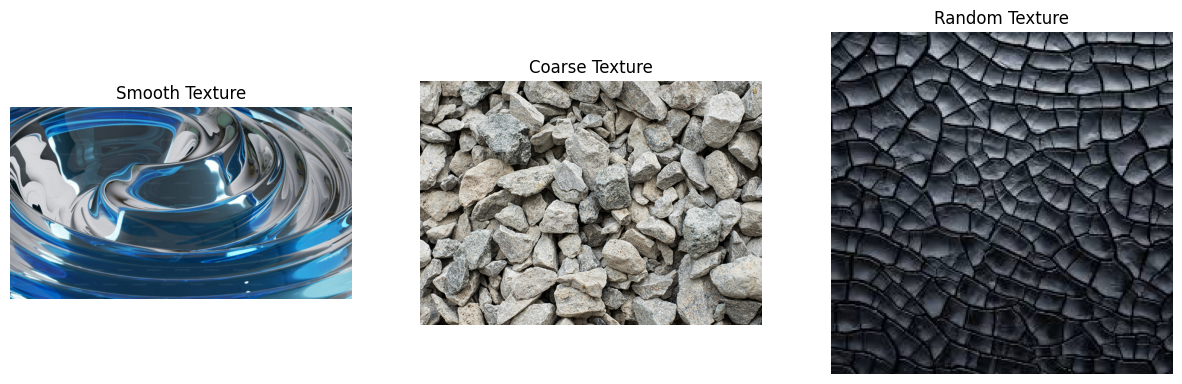

{'Texture': 'Smooth', 'Contrast': 26.826839791778934, 'Homogeneity': 0.5917754567933854, 'Energy': 0.04841695867955954, 'Entropy': 10.471825280370949}
{'Texture': 'Coarse', 'Contrast': 782.697207439199, 'Homogeneity': 0.065995158185325, 'Energy': 0.009268060341570995, 'Entropy': 14.334453867641097}
{'Texture': 'Random', 'Contrast': 611.9324603174603, 'Homogeneity': 0.11043751190771459, 'Energy': 0.015013064353587456, 'Entropy': 13.038386615633238}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.feature import graycomatrix, graycoprops

# Function to calculate GLCM properties
def calculate_glcm_properties(image):
    # Convert image to grayscale
    gray_image = color.rgb2gray(image)
    gray_image = (gray_image * 255).astype(np.uint8)

    # Compute GLCM
    glcm = graycomatrix(gray_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

    # Calculate properties
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    entropy = -np.sum(glcm * np.log2(glcm + (glcm == 0)))  # Avoid log(0) by adding (glcm == 0)

    return contrast, homogeneity, energy, entropy

# Load texture images (smooth, coarse, random)
textures = [
    io.imread('/content/smooth.jpg'),  # Replace with actual smooth texture path
    io.imread('/content/coarse.jpg'), # Replace with actual coarse texture path
    io.imread('/content/random.jpg')  # Replace with actual random texture path
]

# Display texture images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
texture_names = ['Smooth', 'Coarse', 'Random']
for i, texture in enumerate(textures):
    axes[i].imshow(texture, cmap='gray')
    axes[i].set_title(f"{texture_names[i]} Texture")
    axes[i].axis('off')
plt.show()

# Calculate and compare GLCM properties
results = []
for i, texture in enumerate(textures):
    contrast, homogeneity, energy, entropy = calculate_glcm_properties(texture)
    results.append({
        'Texture': texture_names[i],
        'Contrast': contrast,
        'Homogeneity': homogeneity,
        'Energy': energy,
        'Entropy': entropy
    })

# Display the results
for result in results:
    print(result)


Contrast:
Smooth: [26.66199653 59.79765435 29.48787769 44.89697356]
Coarse: [ 777.90935622 1251.71600425  875.66539364 1179.12118658]
Random: [ 616.25059524 1141.35485092 1026.01130952 1335.15756537]

Dissimilarity:
Smooth: [2.06943566 3.26471005 2.46034005 3.17342849]
Coarse: [19.97570815 25.16003681 21.3689436  24.58297138]
Random: [15.6584127  22.29876834 21.14035714 24.75015944]

Homogeneity:
Smooth: [0.60558697 0.49485569 0.54499587 0.48095178]
Coarse: [0.06567648 0.05303077 0.06149796 0.05394965]
Random: [0.1093887  0.06941078 0.07005995 0.0568156 ]

Energy:
Smooth: [0.05066777 0.03975258 0.04401683 0.03940944]
Coarse: [0.00894129 0.00791242 0.00866125 0.00800997]
Random: [0.01691507 0.0129146  0.01350775 0.01206563]

Correlation:
Smooth: [0.99567747 0.99030704 0.99521992 0.99272238]
Coarse: [0.89636584 0.8331911  0.88334423 0.84286505]
Random: [0.8181085  0.6634063  0.69701594 0.60625071]



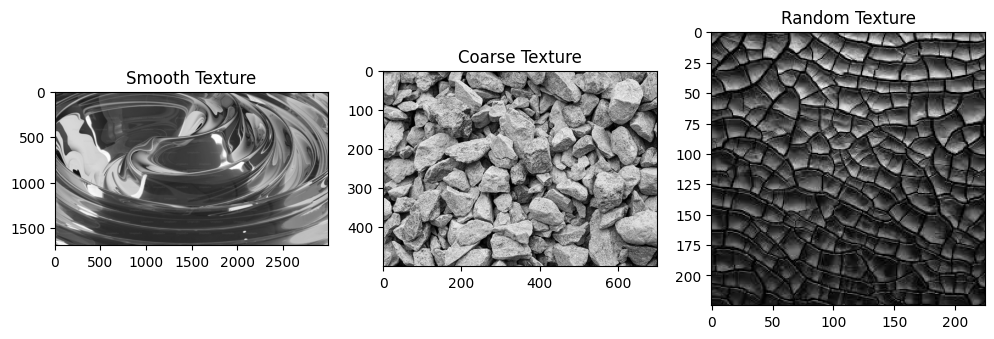

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

# Load the image
def load_image(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Compute GLCM
def compute_glcm(image, distances, angles, levels=256):
    return graycomatrix(image, distances, angles, levels=levels, symmetric=True, normed=True)

# Extract GLCM properties
def extract_glcm_properties(glcm):
    properties = {}
    properties['contrast'] = graycoprops(glcm, 'contrast')
    properties['dissimilarity'] = graycoprops(glcm, 'dissimilarity')
    properties['homogeneity'] = graycoprops(glcm, 'homogeneity')
    properties['energy'] = graycoprops(glcm, 'energy')
    properties['correlation'] = graycoprops(glcm, 'correlation')
    return properties

# Compare textures
def compare_textures(properties_list, labels):
    for prop in ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']:
        print(f"{prop.capitalize()}:")
        for i, properties in enumerate(properties_list):
            print(f"{labels[i]}: {properties[prop].flatten()}")
        print()

# Load images
smooth_image = load_image('/content/smooth.jpg')
coarse_image = load_image('/content/coarse.jpg')
random_image = load_image('/content/random.jpg')

# Compute GLCM for each image
distances = [1]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
glcm_smooth = compute_glcm(smooth_image, distances, angles)
glcm_coarse = compute_glcm(coarse_image, distances, angles)
glcm_random = compute_glcm(random_image, distances, angles)

# Extract properties
properties_smooth = extract_glcm_properties(glcm_smooth)
properties_coarse = extract_glcm_properties(glcm_coarse)
properties_random = extract_glcm_properties(glcm_random)

# Compare textures
labels = ['Smooth', 'Coarse', 'Random']
properties_list = [properties_smooth, properties_coarse, properties_random]
compare_textures(properties_list, labels)

# Plot images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(smooth_image, cmap='gray')
axes[0].set_title('Smooth Texture')
axes[1].imshow(coarse_image, cmap='gray')
axes[1].set_title('Coarse Texture')
axes[2].imshow(random_image, cmap='gray')
axes[2].set_title('Random Texture')
plt.show()


Image shape: (226, 226)
Sky patch shape: (40, 40)
Grass patch shape: (40, 40)
Sky Patch GLCM Properties:
Contrast: 1694.2772
Dissimilarity: 19.4954
Homogeneity: 0.3585
Energy: 0.0954
Correlation: 0.8137

Grass Patch GLCM Properties:
Contrast: 654.3818
Dissimilarity: 14.2484
Homogeneity: 0.1286
Energy: 0.0325
Correlation: 0.7821


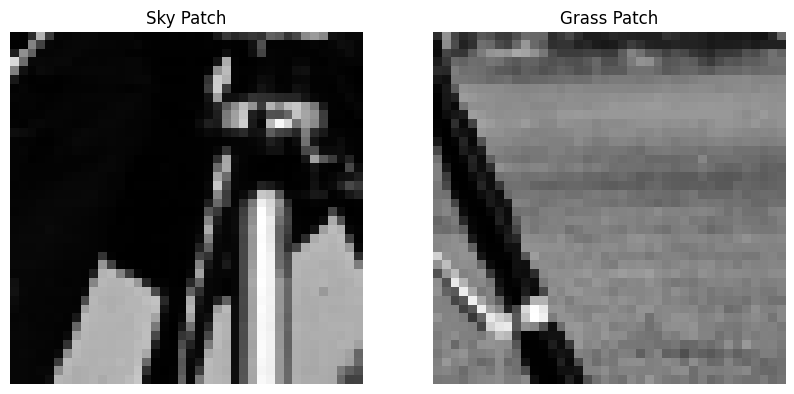

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray
from skimage import io

def load_image(path):
    image = io.imread(path)
    if len(image.shape) == 3:
        image = rgb2gray(image)
    return (image * 255).astype(np.uint8)

def compute_glcm_properties(patch, distances, angles):
    if patch.size == 0:
        raise ValueError("The patch is empty.")
    glcm = graycomatrix(patch, distances, angles, symmetric=True, normed=True)
    properties = {
        'contrast': graycoprops(glcm, 'contrast').mean(),
        'dissimilarity': graycoprops(glcm, 'dissimilarity').mean(),
        'homogeneity': graycoprops(glcm, 'homogeneity').mean(),
        'energy': graycoprops(glcm, 'energy').mean(),
        'correlation': graycoprops(glcm, 'correlation').mean()
    }
    return properties

# Load the image
image_path = '/content/The-original-image-of-Cameraman.png'
image = load_image(image_path)

# Check image dimensions
print(f"Image shape: {image.shape}")

# Define patches for sky and grass
sky_patch = image[90:130, 90:130]
grass_patch = image[150:190, 150:190]  # Adjusted coordinates

# Ensure patches are valid
print(f"Sky patch shape: {sky_patch.shape}")
print(f"Grass patch shape: {grass_patch.shape}")

# Define distances and angles for GLCM
distances = [1]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

# Compute GLCM properties for both patches
sky_properties = compute_glcm_properties(sky_patch, distances, angles)
grass_properties = compute_glcm_properties(grass_patch, distances, angles)

# Print properties
print("Sky Patch GLCM Properties:")
for prop, value in sky_properties.items():
    print(f"{prop.capitalize()}: {value:.4f}")

print("\nGrass Patch GLCM Properties:")
for prop, value in grass_properties.items():
    print(f"{prop.capitalize()}: {value:.4f}")

# Plot patches
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sky_patch, cmap='gray')
plt.title('Sky Patch')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(grass_patch, cmap='gray')
plt.title('Grass Patch')
plt.axis('off')

plt.show()


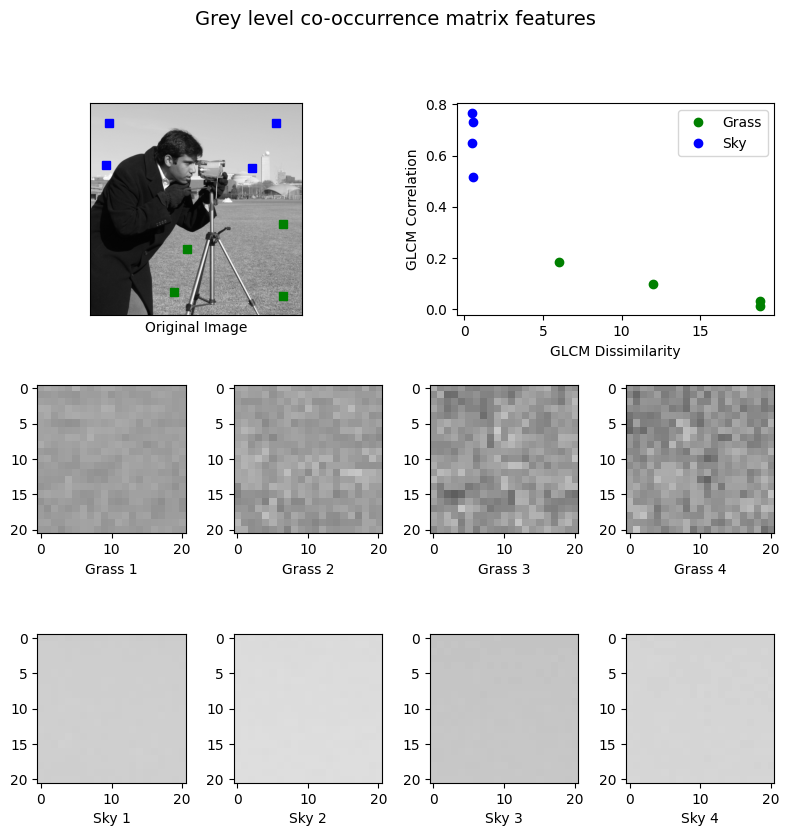

In [ ]:
import matplotlib.pyplot as plt

from skimage.feature import graycomatrix, graycoprops
from skimage import data


PATCH_SIZE = 21

# open the camera image
image = data.camera()

# select some patches from grassy areas of the image
grass_locations = [(280, 454), (342, 223), (444, 192), (455, 455)]
grass_patches = []
for loc in grass_locations:
    grass_patches.append(
        image[loc[0] : loc[0] + PATCH_SIZE, loc[1] : loc[1] + PATCH_SIZE]
    )

# select some patches from sky areas of the image
sky_locations = [(38, 34), (139, 28), (37, 437), (145, 379)]
sky_patches = []
for loc in sky_locations:
    sky_patches.append(
        image[loc[0] : loc[0] + PATCH_SIZE, loc[1] : loc[1] + PATCH_SIZE]
    )

# compute some GLCM properties each patch
xs = []
ys = []
for patch in grass_patches + sky_patches:
    glcm = graycomatrix(
        patch, distances=[5], angles=[0], levels=256, symmetric=True, normed=True
    )
    xs.append(graycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(graycoprops(glcm, 'correlation')[0, 0])

# create the figure
fig = plt.figure(figsize=(8, 8))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray, vmin=0, vmax=255)
for y, x in grass_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for y, x in sky_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[: len(grass_patches)], ys[: len(grass_patches)], 'go', label='Grass')
ax.plot(xs[len(grass_patches) :], ys[len(grass_patches) :], 'bo', label='Sky')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# display the image patches
for i, patch in enumerate(grass_patches):
    ax = fig.add_subplot(3, len(grass_patches), len(grass_patches) * 1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray, vmin=0, vmax=255)
    ax.set_xlabel(f"Grass {i + 1}")

for i, patch in enumerate(sky_patches):
    ax = fig.add_subplot(3, len(sky_patches), len(sky_patches) * 2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray, vmin=0, vmax=255)
    ax.set_xlabel(f"Sky {i + 1}")


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()